X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


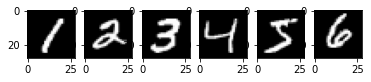

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1903 - accuracy: 0.9439 - val_loss: 0.1076 - val_accuracy: 0.9682


In [5]:
# Importing Libraries
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# import tensorflowjs as tfjs


# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print ("X_train.shape: {}".format(X_train.shape))
print ("y_train.shape: {}".format(y_train.shape))
print ("X_test.shape: {}".format(X_test.shape))
print ("y_test.shape: {}".format(y_test.shape))

# Visualizing Data
plt.subplot(161)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(162)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(163)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(164)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(165)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(166)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))

plt.show()

# Normalize Inputs from 0–255 to 0–1
X_train = X_train / 255
X_test = X_test / 255
# One-Hot Encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = 10

# Training model
x_train_simple = X_train.reshape(60000, 28 * 28).astype('float32')
x_test_simple = X_test.reshape(10000, 28 * 28).astype('float32')
model = Sequential()
model.add(Dense(28 * 28, input_dim=28 * 28, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
		optimizer='adam', metrics=['accuracy'])
model.fit(x_train_simple, y_train,
		validation_data=(x_test_simple, y_test))

model.save("model.h5")